### Обработка набора данных

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

Считывание данных с помощью keras.datasets.fashion_mnist.load_data

In [46]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [47]:
x_train.shape

(60000, 28, 28)

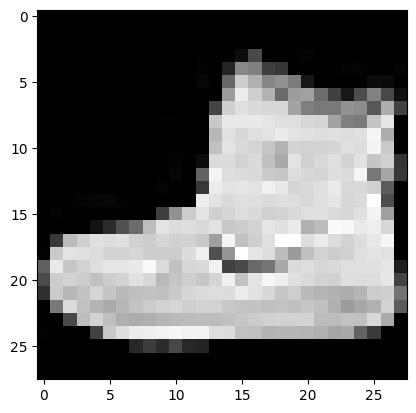

In [48]:
plt.imshow(x_train[0], cmap="gray")

Нормализация

In [49]:
x_train = x_train / 255
x_test = x_test / 255

Преобразование картинок в "линию"

![image.png](attachment:image.png)

In [50]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_train.shape

(60000, 784)

In [51]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
x_test.shape

(10000, 784)

In [52]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Преобразование классов в one-hot енкодинг с помощью keras.utils.to_categorical

In [53]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [54]:
y_test = keras.utils.to_categorical(y_test, num_classes)
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
x_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [56]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Создание "последовательной" модели

In [57]:
input_shape = (x_train[0].shape)
input_shape

(784,)

In [58]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Dense(10, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

In [59]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                7850      
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [61]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
batch_size = 128
epochs = 20
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 3s 5ms/step - loss: 0.9866 - accuracy: 0.6864 - val_loss: 0.5975 - val_accuracy: 0.7997
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.5368 - accuracy: 0.8194 - val_loss: 0.5015 - val_accuracy: 0.8258
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.4783 - accuracy: 0.8370 - val_loss: 0.4661 - val_accuracy: 0.8362
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.4509 - accuracy: 0.8461 - val_loss: 0.4614 - val_accuracy: 0.8363
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.4358 - accuracy: 0.8494 - val_loss: 0.4355 - val_accuracy: 0.8430
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.4243 - accuracy: 0.8537 - val_loss: 0.4290 - val_accuracy: 0.8475
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.4162 - accuracy: 0.8562 - val_loss: 0.4227 - val_accuracy: 0.8490
Epoch 

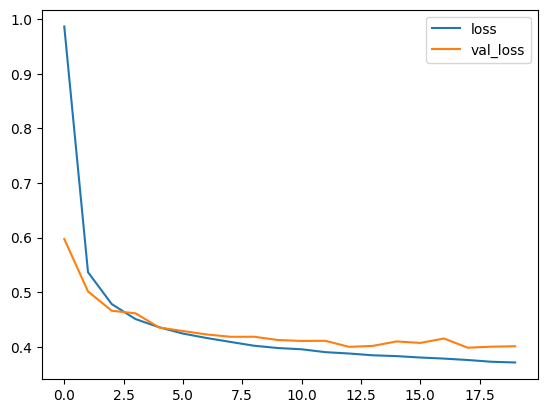

In [63]:
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()

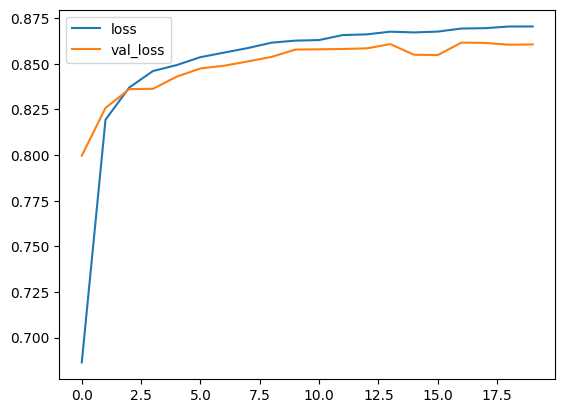

In [64]:
plt.plot(history.history['accuracy'], label="loss")
plt.plot(history.history['val_accuracy'], label="val_loss")
plt.legend()

In [65]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 2s 5ms/step - loss: 0.3697 - accuracy: 0.8719 - val_loss: 0.4212 - val_accuracy: 0.8507
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.3708 - accuracy: 0.8713 - val_loss: 0.4015 - val_accuracy: 0.8607
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3663 - accuracy: 0.8726 - val_loss: 0.3994 - val_accuracy: 0.8587
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.3653 - accuracy: 0.8728 - val_loss: 0.3969 - val_accuracy: 0.8637
Epoch 5/10
422/422 [==============================] - 1s 3ms/step - loss: 0.3656 - accuracy: 0.8733 - val_loss: 0.4003 - val_accuracy: 0.8582
Epoch 6/10
422/422 [==============================] - 1s 3ms/step - loss: 0.3618 - accuracy: 0.8744 - val_loss: 0.4049 - val_accuracy: 0.8603
Epoch 7/10
422/422 [==============================] - 1s 3ms/step - loss: 0.3620 - accuracy: 0.8736 - val_loss: 0.3949 - val_accuracy: 0.8620
Epoch 

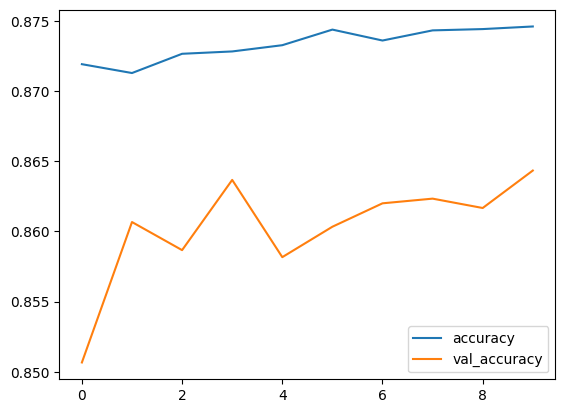

In [66]:
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()

In [67]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4263 - accuracy: 0.8550


[0.42626142501831055, 0.8550000190734863]

In [68]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
batch_size = 128
epochs = 20
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 3s 6ms/step - loss: 0.5632 - accuracy: 0.8043 - val_loss: 0.4301 - val_accuracy: 0.8488
Epoch 2/20
422/422 [==============================] - 2s 5ms/step - loss: 0.3964 - accuracy: 0.8599 - val_loss: 0.3793 - val_accuracy: 0.8685
Epoch 3/20
422/422 [==============================] - 2s 5ms/step - loss: 0.3515 - accuracy: 0.8721 - val_loss: 0.4293 - val_accuracy: 0.8460
Epoch 4/20
422/422 [==============================] - 2s 6ms/step - loss: 0.3245 - accuracy: 0.8829 - val_loss: 0.3427 - val_accuracy: 0.8760
Epoch 5/20
422/422 [==============================] - 3s 8ms/step - loss: 0.3038 - accuracy: 0.8891 - val_loss: 0.3406 - val_accuracy: 0.8803
Epoch 6/20
422/422 [==============================] - 3s 7ms/step - loss: 0.2882 - accuracy: 0.8952 - val_loss: 0.3367 - val_accuracy: 0.8773
Epoch 7/20
422/422 [==============================] - 2s 5ms/step - loss: 0.2788 - accuracy: 0.8968 - val_loss: 0.3250 - val_accuracy: 0.8837
Epoch 

In [69]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3587 - accuracy: 0.8873


[0.35870659351348877, 0.8873000144958496]

Обучение сверточной сети

In [ ]:
x_train.shape

In [ ]:
input_shape = (28, 28, 1)
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train.shape

In [ ]:
import numpy as np

In [ ]:
x_train = np.expand_dims(x_train, -1) #изменение формы np массива
x_train.shape

In [ ]:
x_test = np.expand_dims(x_test, -1)
x_test.shape

In [ ]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(36, kernel_size=(3, 3), activation="relu"),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(36, kernel_size=(3, 3), activation="relu"),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])
model.summary()

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [85]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 3s 8ms/step - loss: 0.3496 - accuracy: 0.8718 - val_loss: 0.4509 - val_accuracy: 0.8583
Epoch 2/20
422/422 [==============================] - 3s 6ms/step - loss: 0.3410 - accuracy: 0.8754 - val_loss: 0.4245 - val_accuracy: 0.8587
Epoch 3/20
422/422 [==============================] - 2s 6ms/step - loss: 0.3404 - accuracy: 0.8756 - val_loss: 0.4435 - val_accuracy: 0.8597
Epoch 4/20
422/422 [==============================] - 2s 5ms/step - loss: 0.3312 - accuracy: 0.8789 - val_loss: 0.4799 - val_accuracy: 0.8440
Epoch 5/20
422/422 [==============================] - 2s 6ms/step - loss: 0.3386 - accuracy: 0.8772 - val_loss: 0.4543 - val_accuracy: 0.8585
Epoch 6/20
422/422 [==============================] - 4s 8ms/step - loss: 0.3381 - accuracy: 0.8756 - val_loss: 0.4427 - val_accuracy: 0.8602
Epoch 7/20
422/422 [==============================] - 2s 6ms/step - loss: 0.3219 - accuracy: 0.8810 - val_loss: 0.4315 - val_accuracy: 0.8578
Epoch 

In [86]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5038 - accuracy: 0.8506


[0.5037893056869507, 0.850600004196167]

In [87]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5038 - accuracy: 0.8506


[0.5037893056869507, 0.850600004196167]

Ранняя остановка

In [70]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [71]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [72]:
x_test.shape

(10000, 784)

In [73]:
input_shape = (x_train[0].shape)
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Dense(200, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
batch_size = 128
epochs = 20

In [74]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

In [77]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_split=0.1, callbacks=[callback])

Epoch 1/20
422/422 [==============================] - 3s 6ms/step - loss: 0.3673 - accuracy: 0.8655 - val_loss: 0.4378 - val_accuracy: 0.8517
Epoch 2/20
422/422 [==============================] - 2s 6ms/step - loss: 0.3660 - accuracy: 0.8672 - val_loss: 0.4235 - val_accuracy: 0.8545
Epoch 3/20
422/422 [==============================] - 3s 8ms/step - loss: 0.3649 - accuracy: 0.8665 - val_loss: 0.4716 - val_accuracy: 0.8522
Epoch 4/20
422/422 [==============================] - 2s 6ms/step - loss: 0.3595 - accuracy: 0.8684 - val_loss: 0.4511 - val_accuracy: 0.8500
Epoch 5/20
422/422 [==============================] - 3s 6ms/step - loss: 0.3596 - accuracy: 0.8682 - val_loss: 0.4435 - val_accuracy: 0.8600
Epoch 6/20
422/422 [==============================] - 2s 6ms/step - loss: 0.3470 - accuracy: 0.8733 - val_loss: 0.4176 - val_accuracy: 0.8578
Epoch 7/20
422/422 [==============================] - 2s 6ms/step - loss: 0.3478 - accuracy: 0.8718 - val_loss: 0.4523 - val_accuracy: 0.8527
Epoch 

In [78]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4448 - accuracy: 0.8507


[0.4448162019252777, 0.8507000207901001]

In [79]:
from sklearn.neural_network import MLPClassifier

In [80]:
model.weights

[<tf.Variable 'dense_16/kernel:0' shape=(784, 200) dtype=float32, numpy=
 array([[ 0.07072759, -0.06153327, -0.01355398, ..., -0.03159749,
          0.05307689, -0.01303608],
        [ 0.12322818, -0.05813505,  0.07078777, ..., -0.03581895,
          0.00919753,  0.06566226],
        [ 0.07763956,  0.06037791, -0.01834198, ...,  0.00361033,
          0.05922287, -0.08285341],
        ...,
        [ 0.1161076 , -0.06545649, -0.01013772, ...,  0.01866827,
          0.01716352, -0.07355282],
        [ 0.3018264 ,  0.05044405,  0.05884806, ...,  0.01181038,
          0.0062051 , -0.01358342],
        [-0.02986121,  0.05298477,  0.04188446, ..., -0.05202256,
          0.01870285,  0.02447169]], dtype=float32)>,
 <tf.Variable 'dense_16/bias:0' shape=(200,) dtype=float32, numpy=
 array([-1.89084902e-01, -8.27280246e-03, -2.34084986e-02,  1.87482778e-02,
         7.38209710e-02, -3.51676419e-02, -6.99566863e-03,  6.26942739e-02,
        -3.88768595e-03, -2.58557856e-01, -1.46874450e-02, -2.085

Сохранение лучшей модели

In [81]:
from keras.callbacks import ModelCheckpoint

In [82]:
import datetime

In [83]:
checkpoint = ModelCheckpoint("best_model.hdf5", monitor="loss",
                             save_best_only=True, mode="auto", save_freq=1)

In [84]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1,
                   callbacks=[callback, checkpoint])

Epoch 1/20
 20/422 [>.............................] - ETA: 3s - loss: 0.3324 - accuracy: 0.8691

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


422/422 [==============================] - 3s 7ms/step - loss: 0.3612 - accuracy: 0.8686 - val_loss: 0.4270 - val_accuracy: 0.8515
Epoch 2/20
422/422 [==============================] - 2s 6ms/step - loss: 0.3496 - accuracy: 0.8714 - val_loss: 0.4351 - val_accuracy: 0.8555
Epoch 3/20
422/422 [==============================] - 3s 6ms/step - loss: 0.3444 - accuracy: 0.8750 - val_loss: 0.5047 - val_accuracy: 0.8435
Epoch 4/20
422/422 [==============================] - 3s 7ms/step - loss: 0.3421 - accuracy: 0.8743 - val_loss: 0.4497 - val_accuracy: 0.8528
Epoch 5/20
422/422 [==============================] - 4s 9ms/step - loss: 0.3389 - accuracy: 0.8759 - val_loss: 0.4718 - val_accuracy: 0.8502
Epoch 6/20
422/422 [==============================] - 3s 6ms/step - loss: 0.3324 - accuracy: 0.8778 - val_loss: 0.4574 - val_accuracy: 0.8548
